# 주차 수요 예측

## 라이브러리 불러오기

In [564]:
from glob import glob 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import plotly.express as px 
import folium

## 컬럼 설명

train data column description :
- 단지코드(key)
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수: 빈집
- 자격유형: 임차를 할 수 있는 자격 요건
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수
- 등록차량수(target)

## 데이터 불러오기

In [565]:
age_data = glob('data/*.csv')[0]

In [566]:
submission = glob('data/*.csv')[3]

In [567]:
test_file_name = glob('data/*.csv')[1]

In [568]:
train_file_name = glob('data/*.csv')[2]

In [569]:
train = pd.read_csv(train_file_name)

In [570]:
test = pd.read_csv(test_file_name)

In [571]:
train.shape, test.shape

((2952, 15), (1022, 14))

## 데이터 타입 

In [572]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [573]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

In [574]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.00,A,15667000,103680,0.00,3.00,1425.00,1015.00
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.00,A,15667000,103680,0.00,3.00,1425.00,1015.00
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.00,A,27304000,184330,0.00,3.00,1425.00,1015.00
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.00,A,27304000,184330,0.00,3.00,1425.00,1015.00
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.00,A,27304000,184330,0.00,3.00,1425.00,1015.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.00,A,11346000,116090,0.00,1.00,166.00,146.00
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.00,A,14005000,142310,0.00,1.00,166.00,146.00
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.00,A,14005000,142310,0.00,1.00,166.00,146.00
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.00,A,14005000,142310,0.00,1.00,166.00,146.00


# 오류 대처
## 1번 : 전용면적별 세대수 합계와 총세대수가 일치하지 않는 경우  

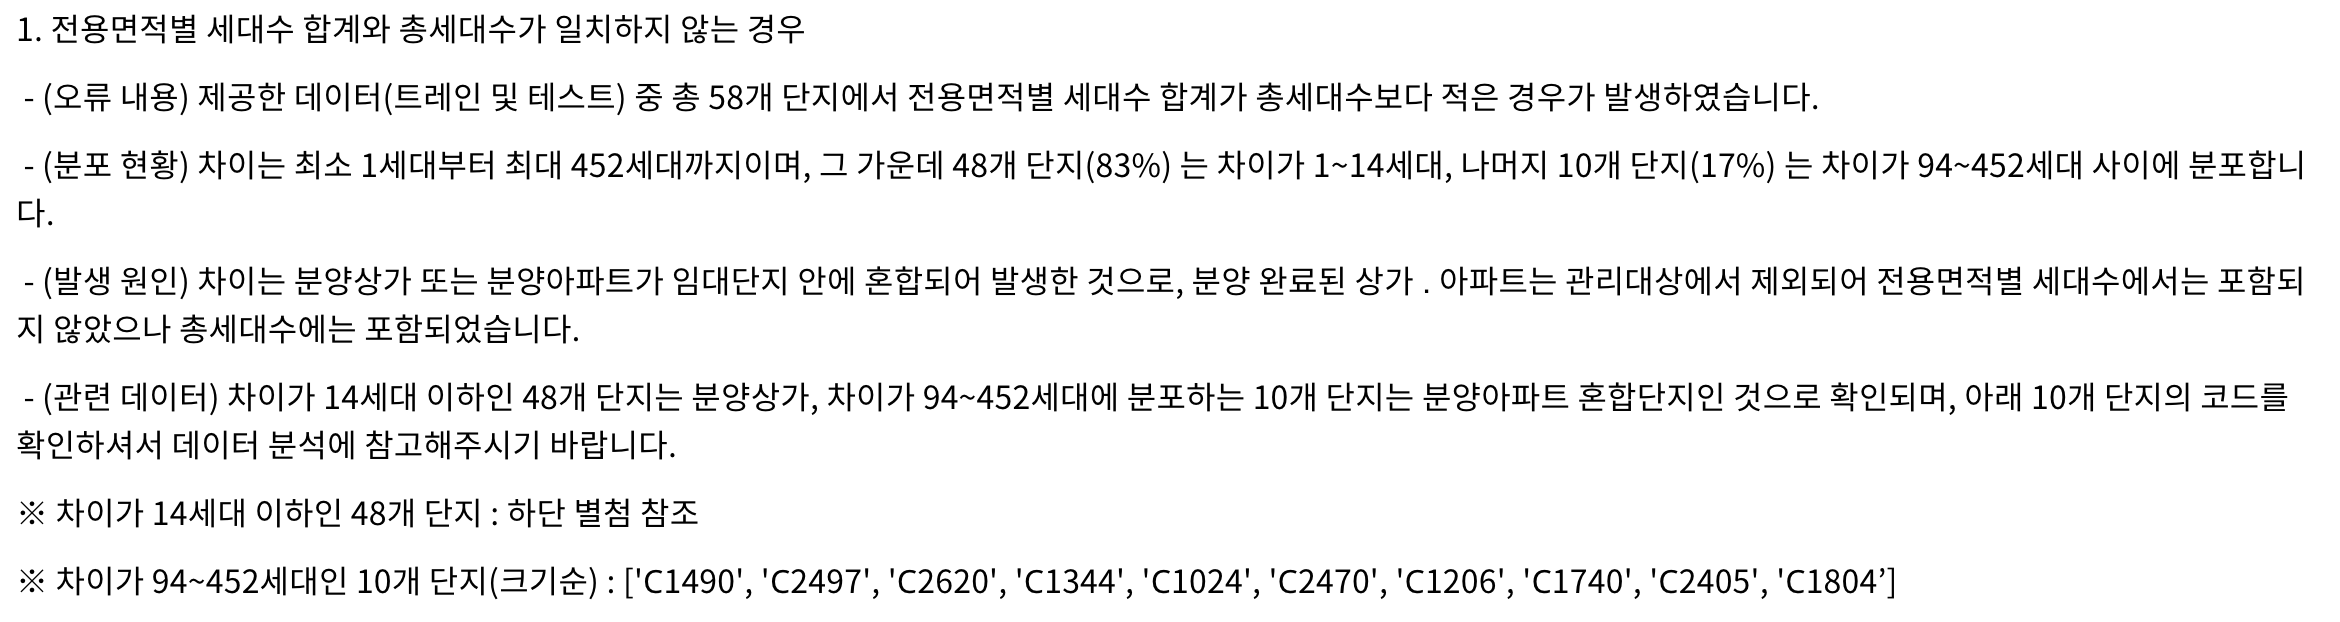

In [575]:
train = train.drop_duplicates()

In [576]:
test = test.drop_duplicates()

In [577]:
differ = train.groupby('단지코드').agg({'총세대수':'unique', '전용면적별세대수':'sum'})
differ['총세대수'] = differ['총세대수'].str[0].astype(int)
differ = differ[differ['총세대수'] != differ['전용면적별세대수']]
differ['차이'] = differ['총세대수'] - differ['전용면적별세대수']
differ

,총세대수,전용면적별세대수,차이
단지코드,,,
C1004,521,517,4
C1024,680,477,203
C1056,410,401,9
C1068,806,805,1
C1109,1957,1952,5
...,...,...,...
C2583,1106,1034,72
C2597,1005,991,14
C2620,1029,906,123


Text(0.5, 1.0, '총세대수와 전용면적별 세대수 합계 차')

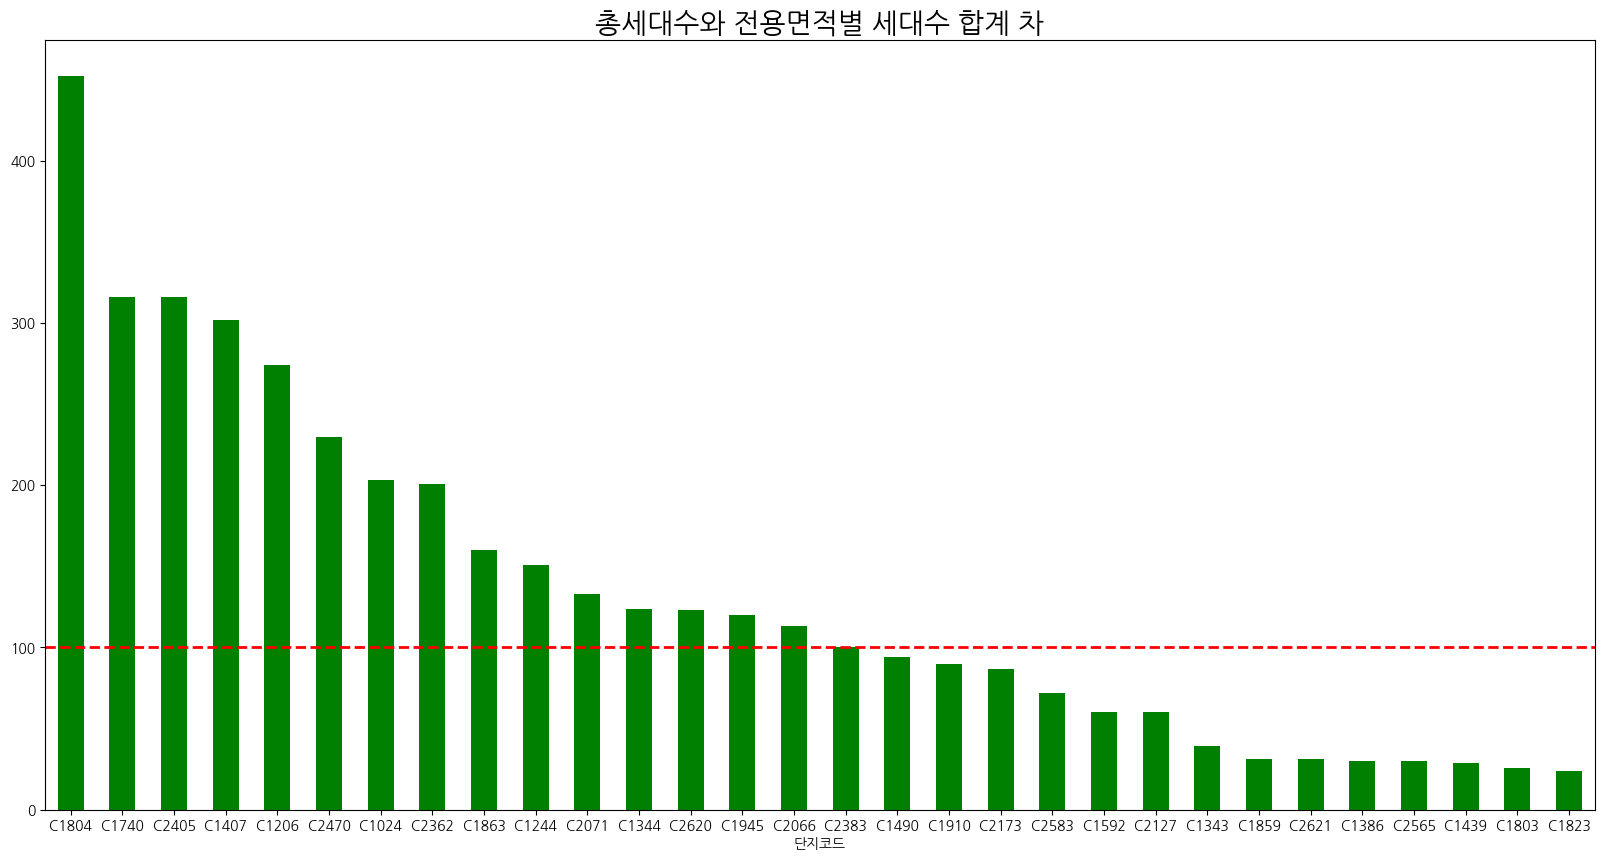

In [578]:
ax = differ.loc[differ['차이'] > 20, '차이'].sort_values(ascending=False).plot.bar(figsize=(20,10), color='Green', rot=0)
ax.axhline(y=100, color='r', linestyle='--', linewidth=2)
ax.set_title('총세대수와 전용면적별 세대수 합계 차', fontsize=20)


### 총세대수를 드랍하고 전용면적별세대수의 합계로 대체 

In [579]:
correct_train = train.groupby('단지코드').agg({'전용면적별세대수':'sum'})
train['총합계'] = train['단지코드'].map(correct_train['전용면적별세대수'])

/var/folders/yq/x6k6x6pn1799dnrdtwkc2y3c0000gn/T/ipykernel_64978/2440393806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['총합계'] = train['단지코드'].map(correct_train['전용면적별세대수'])


In [580]:
correct_train

,전용면적별세대수
단지코드,
C1000,566
C1004,517
C1005,1144
C1013,1308
C1014,996
...,...
C2663,772
C2666,1084
C2670,648


In [581]:
correct_train = train.groupby('단지코드').agg({'전용면적별세대수':'sum'})
train['총합계'] = train['단지코드'].map(correct_train['전용면적별세대수'])

correct_test = test.groupby('단지코드').agg({'전용면적별세대수':'sum'})
test['총합계'] = test['단지코드'].map(correct_test['전용면적별세대수'])

In [582]:
# 기존 세대수 column 삭제 and 컬럼 순서 조정 
train = train[['단지코드', '총합계', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']]

In [583]:
# 기존 세대수 column 삭제 and 컬럼 순서 조정 
test = test[['단지코드', '총합계', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수']]

## 2번 : 동일한 단지에 단지코드가 2개로 부여된 경우  



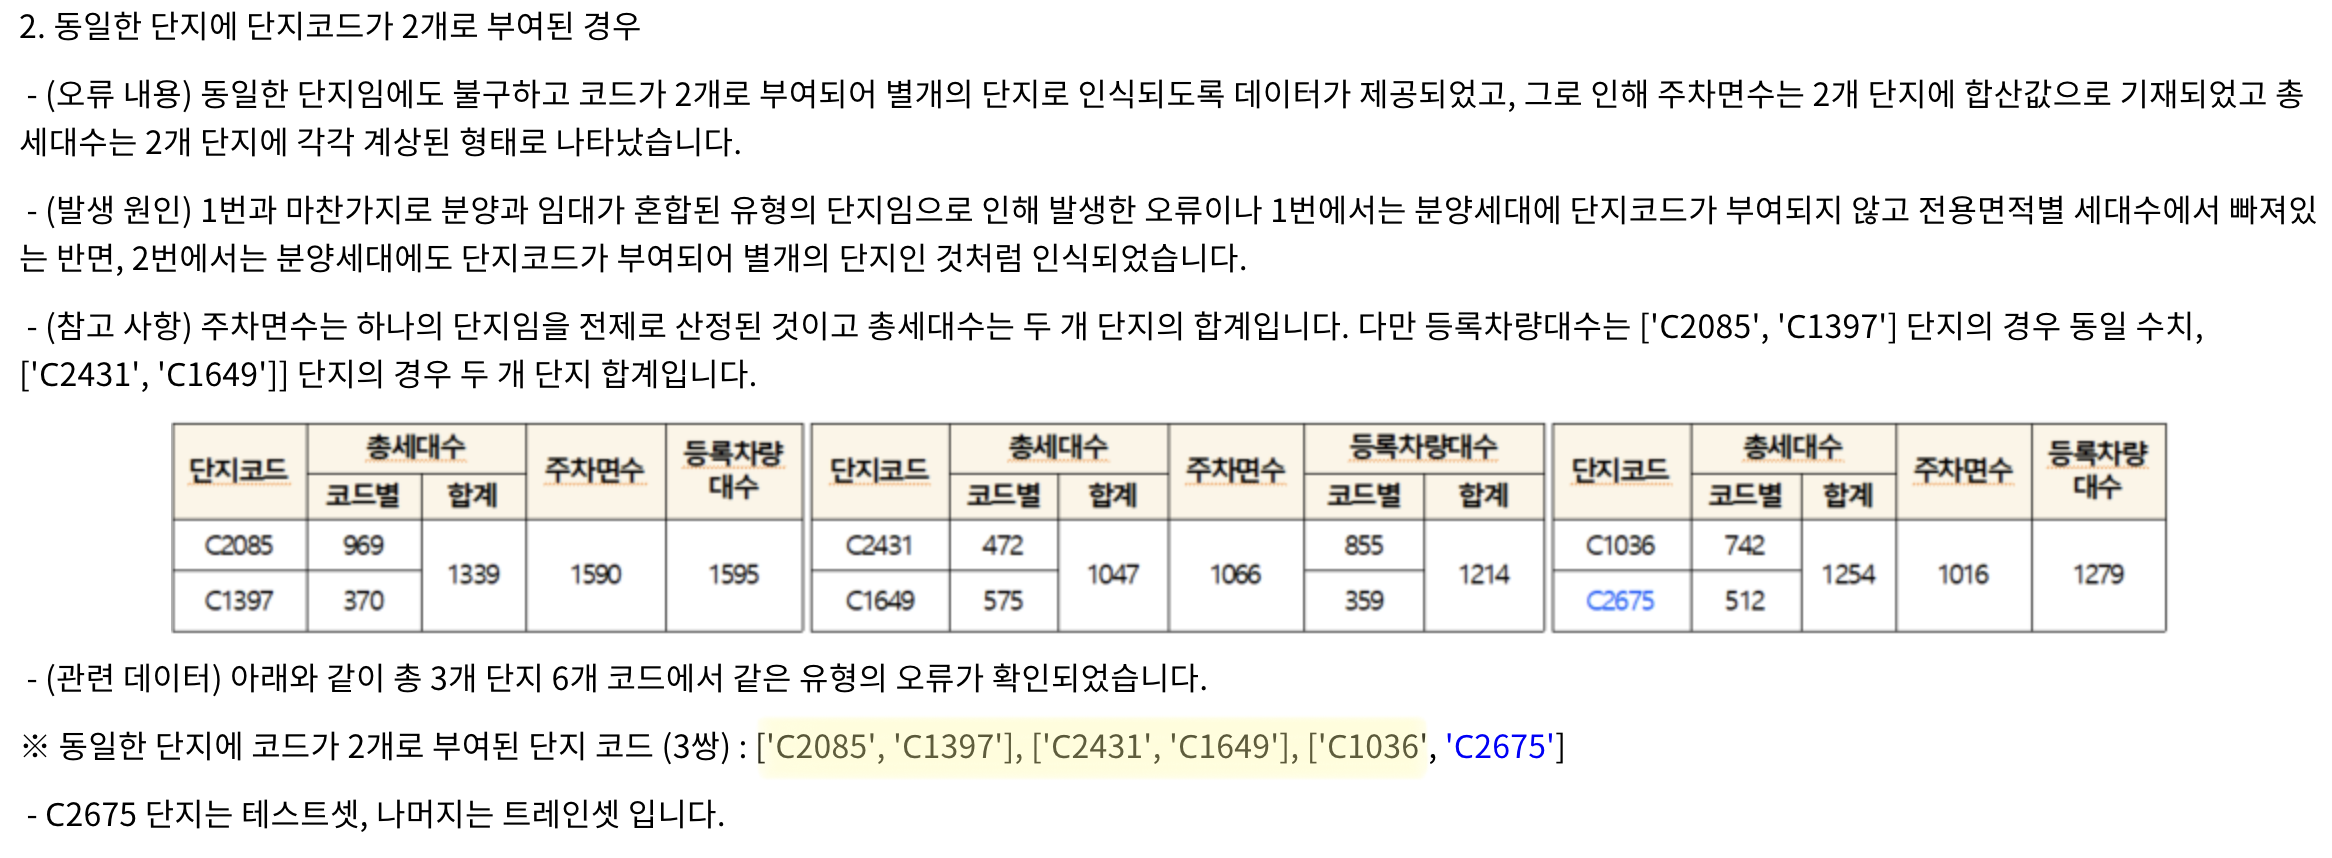

In [584]:
# 오류 2번 해당 train 데이터셋 제거
train = train[train['단지코드'] != 'C2085']
train = train[train['단지코드'] != 'C1397']
train = train[train['단지코드'] != 'C2431']
train = train[train['단지코드'] != 'C1649']
train = train[train['단지코드'] != 'C1036']

## 오류 3번 : 단지코드 등 기입 실수로 데이터 정제 과정에서 매칭 오류 발생  



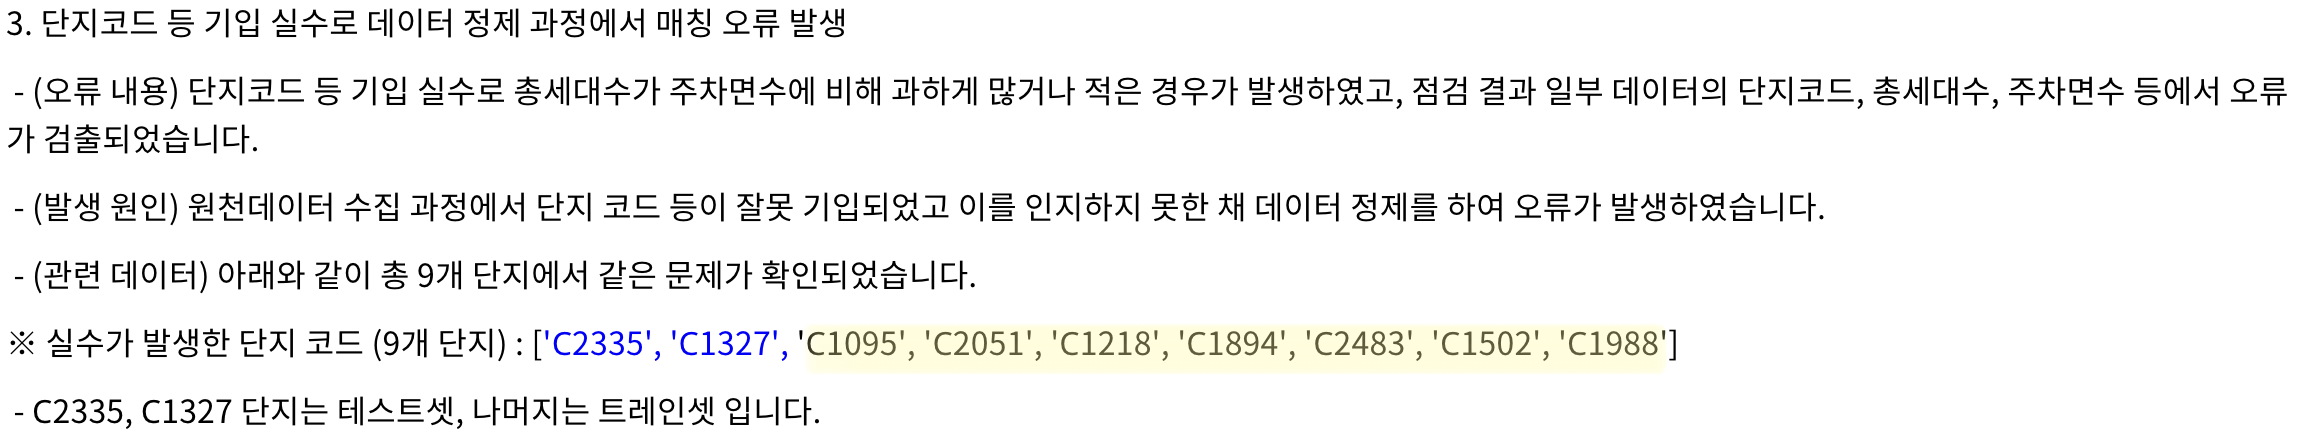

In [585]:
# 오류 3번 해당 train 데이터셋 제거
train = train[train['단지코드'] != 'C1095']
train = train[train['단지코드'] != 'C2051']
train = train[train['단지코드'] != 'C1218']
train = train[train['단지코드'] != 'C1894']
train = train[train['단지코드'] != 'C2483']
train = train[train['단지코드'] != 'C1502']
train = train[train['단지코드'] != 'C1988']

* 오류값 조정 후 shape 값 비교
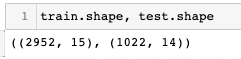

In [586]:
train.shape, test.shape

((2549, 15), (949, 14))

# EDA

## 데이터 타입 확인

In [587]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2549 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2549 non-null   object 
 1   총합계                           2549 non-null   int64  
 2   임대건물구분                        2549 non-null   object 
 3   지역                            2549 non-null   object 
 4   공급유형                          2549 non-null   object 
 5   전용면적                          2549 non-null   float64
 6   전용면적별세대수                      2549 non-null   int64  
 7   공가수                           2549 non-null   float64
 8   자격유형                          2549 non-null   object 
 9   임대보증금                         2257 non-null   object 
 10  임대료                           2257 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2398 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2549 non-null   float64
 13  단지내

In [588]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          949 non-null    object 
 1   총합계                           949 non-null    int64  
 2   임대건물구분                        949 non-null    object 
 3   지역                            949 non-null    object 
 4   공급유형                          949 non-null    object 
 5   전용면적                          949 non-null    float64
 6   전용면적별세대수                      949 non-null    int64  
 7   공가수                           949 non-null    float64
 8   자격유형                          947 non-null    object 
 9   임대보증금                         835 non-null    object 
 10  임대료                           835 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  915 non-null    float64
 12  도보 10분거리 내 버스정류장 수            949 non-null    float64
 13  단지내주

## 결측치 확인

In [589]:
train['임대보증금'] = train['임대보증금'].replace('-',np.nan)
train['임대보증금'] = train['임대보증금'].astype(float)

train['임대료'] = train['임대료'].replace('-',np.nan)
train['임대료'] = train['임대료'].astype(float)

test['임대보증금'] = test['임대보증금'].replace('-',np.nan)
test['임대보증금'] = test['임대보증금'].astype(float)

test['임대료'] = test['임대료'].replace('-',np.nan)
test['임대료'] = test['임대료'].astype(float)

In [590]:
# '-'을 null로 바꾸니 결측치가 늘어난 것을 확인 
train.isnull().sum()

단지코드                              0
총합계                               0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           304
임대료                             307
도보 10분거리 내 지하철역 수(환승노선 수 반영)    151
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [591]:
test.isnull().sum()

단지코드                              0
총합계                               0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           120
임대료                             120
도보 10분거리 내 지하철역 수(환승노선 수 반영)     34
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

결측치 항목 
- train
    * 임대보증금 : 581
    * 임대료 : 584
    * 도보 10분거리 내 지하철역 수(환승노선 수 반영) : 207
- test 
    * 자격유형 : 2
    * 임대보증금 : 186
    * 임대료 : 186
    * 도보 10분거리 내 지하철역 수(환승노선 수 반영) : 42
    

### 임대료, 임대보증금 결측치 처리 (민기님) 

### 국민임대, 행복주택 결측값 가중치 처리

In [592]:
# train데이터 임대 보증금 결측치 처리
train.loc[train['공급유형'] == '공공분양','임대보증금'] = train['임대보증금'].fillna(0)
train.loc[(train['공급유형'] == '국민임대') & (train['지역'] == '부산광역시'),'임대보증금']  =  train['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
train.loc[(train['공급유형'] == '행복주택') & (train['지역'] == '강원도'),'임대보증금']  =  train['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
train.loc[(train['공급유형'] == '국민임대') & (train['지역'] == '대구광역시'),'임대보증금']  =  train['임대보증금'].fillna(train[train['지역'] == '대구광역시']['임대보증금'].mean())

# train데이터 임대료 결측치 처리
train.loc[train['공급유형'] == '공공분양','임대료'] = train['임대료'].fillna(0)
train.loc[(train['공급유형'] == '장기전세') & (train['지역'] == '서울특별시'),'임대료']  =  train['임대료'].fillna(0)
train.loc[(train['공급유형'] == '국민임대') & (train['지역'] == '부산광역시'),'임대료']  =  train['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
train.loc[(train['공급유형'] == '행복주택') & (train['지역'] == '강원도'),'임대료']  =  train['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
train.loc[(train['공급유형'] == '국민임대') & (train['지역'] == '대구광역시'),'임대료']  =  train['임대료'].fillna(train[train['지역'] == '대구광역시']['임대료'].mean())


In [593]:
# 임대 보증금 결측치 처리
test.loc[(test['공급유형'] == '행복주택') & (test['지역'] == '경상남도'),'임대보증금']  =  test['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())
test.loc[(test['공급유형'] == '영구임대') & (test['지역'] == '강원도'),'임대보증금']  =  test['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean()*0.5)
test.loc[(test['공급유형'] == '영구임대') & (test['지역'] == '대전광역시'),'임대보증금']  =  test['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean()*0.5)


# 임대료 결측치 처리
test.loc[(test['공급유형'] == '행복주택') & (test['지역'] == '경상남도'),'임대료']  =  test['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())
test.loc[(test['공급유형'] == '영구임대') & (test['지역'] == '강원도'),'임대료']  =  test['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean()*0.5)
test.loc[(test['공급유형'] == '영구임대') & (test['지역'] == '대전광역시'),'임대료']  =  test['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean()*0.5)

In [594]:
# train 데이터 
# 임대상가 임대료 처리 
train.loc[train['지역'] == '부산광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
train.loc[train['지역'] == '대전광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
train.loc[train['지역'] == '경상남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())
train.loc[train['지역'] == '충청남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
train.loc[train['지역'] == '강원도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '제주특별자치도']['임대료'].mean())

# 임대상가 임대보증금 처리 
train.loc[train['지역'] == '부산광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
train.loc[train['지역'] == '대전광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
train.loc[train['지역'] == '경상남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())
train.loc[train['지역'] == '충청남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
train.loc[train['지역'] == '강원도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '제주특별자치도']['임대보증금'].mean())

In [595]:

# test 데이터 
# 임대상가 임대료 처리 
test.loc[test['지역'] == '부산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
test.loc[test['지역'] == '대전광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
test.loc[test['지역'] == '울산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '울산광역시']['임대료'].mean())
test.loc[test['지역'] == '충청남도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
test.loc[test['지역'] == '강원도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())  


# 임대상가 임대보증금 처리 
test.loc[test['지역'] == '부산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '대전광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
test.loc[test['지역'] == '울산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '울산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '충청남도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
test.loc[test['지역'] == '강원도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())


### train 데이터 : 도보 10분거리 내 지하철역 수(환승노선 수 반영)

In [596]:
# '도보 10분거리 내 지하철역 수(환승노선 수 반영)'의 결측치는 충청남도와 대전광역시에만 존재
# 민기님의 테블로 파일에 보면 대전광역시 지하철 근처에 있는 국민임대 아파트가 많지 않음 또한 충청남도에는 지하철이 없음 
# 따라서 결측치 0으로 처리 
train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].value_counts()

충청남도     82
대전광역시    69
Name: 지역, dtype: int64

In [597]:
test[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].value_counts()

충청남도     26
대전광역시     8
Name: 지역, dtype: int64

In [598]:
cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)']
train[cols] = train[cols].fillna(0)
test[cols] = test[cols].fillna(0)

### test 데이터 : 자격유형

In [599]:
test[test['자격유형'].isnull()]

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,961,아파트,경상남도,국민임대,46.90,240,25.00,NaN,71950000.00,37470.00,0.00,2.00,840.00
258,C2253,1149,아파트,강원도,영구임대,26.37,745,0.00,NaN,2249000.00,44770.00,0.00,2.00,173.00


In [600]:
test[test['단지코드'] == 'C2411']

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,961,아파트,경상남도,국민임대,39.43,56,25.00,A,11992000.00,100720.00,0.00,2.00,840.00
194,C2411,961,아파트,경상남도,국민임대,39.72,336,25.00,A,11992000.00,100720.00,0.00,2.00,840.00
195,C2411,961,아파트,경상남도,국민임대,39.82,179,25.00,A,11992000.00,100720.00,0.00,2.00,840.00
196,C2411,961,아파트,경상남도,국민임대,46.90,240,25.00,NaN,71950000.00,37470.00,0.00,2.00,840.00
197,C2411,961,아파트,경상남도,국민임대,51.93,150,25.00,A,21586000.00,171480.00,0.00,2.00,840.00


In [601]:
test[test['단지코드'] == 'C2411'] = test[test['단지코드'] == 'C2411'].fillna('A')

In [602]:
test[test['단지코드'] == 'C2253'].head()

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1149,아파트,강원도,영구임대,26.37,745,0.00,NaN,2249000.00,44770.00,0.00,2.00,173.00
259,C2253,1149,아파트,강원도,영구임대,31.32,239,0.00,C,3731000.00,83020.00,0.00,2.00,173.00
260,C2253,1149,아파트,강원도,영구임대,31.32,149,0.00,C,3731000.00,83020.00,0.00,2.00,173.00
261,C2253,1149,상가,강원도,임대상가,13.77,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
262,C2253,1149,상가,강원도,임대상가,22.89,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00


In [603]:
test[test['단지코드'] == 'C2253'].sample(10)

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
288,C2253,1149,상가,강원도,임대상가,248.56,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
261,C2253,1149,상가,강원도,임대상가,13.77,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
281,C2253,1149,상가,강원도,임대상가,28.93,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
285,C2253,1149,상가,강원도,임대상가,55.17,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
287,C2253,1149,상가,강원도,임대상가,82.92,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
258,C2253,1149,아파트,강원도,영구임대,26.37,745,0.00,NaN,2249000.00,44770.00,0.00,2.00,173.00
283,C2253,1149,상가,강원도,임대상가,42.35,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
268,C2253,1149,상가,강원도,임대상가,24.19,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
275,C2253,1149,상가,강원도,임대상가,28.19,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
284,C2253,1149,상가,강원도,임대상가,42.40,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00


In [604]:
# 임대보증금과 임대료가 있는 경우는 자격유형 C 
test[test['단지코드'] == 'C2253'] = test[test['단지코드'] == 'C2253'].fillna('C')

### 버스 정류장 이상치 처리

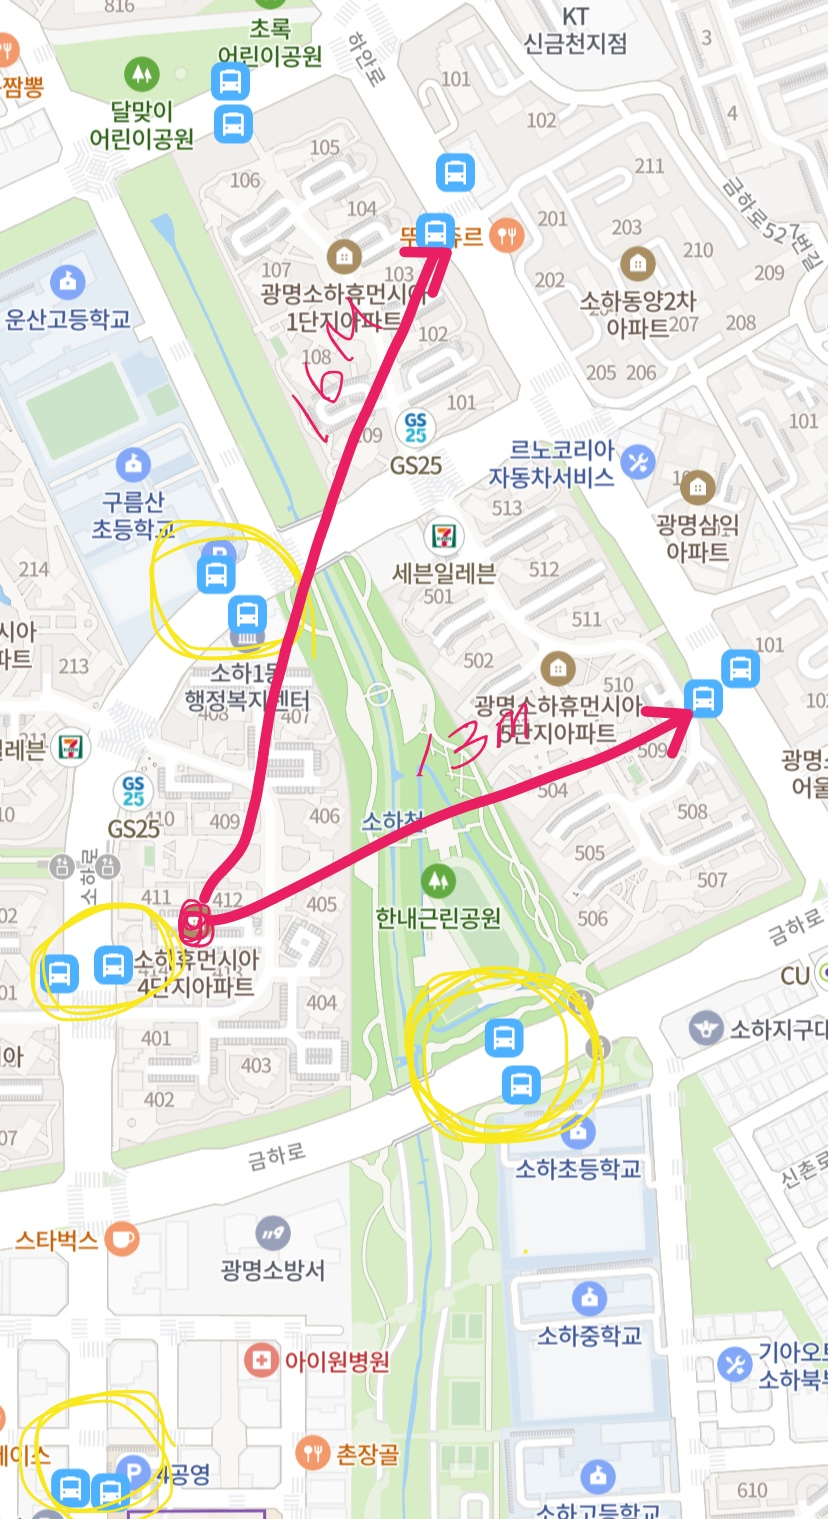

In [605]:
test['도보 10분거리 내 버스정류장 수'].unique()

array([ 2.,  3., 16.,  6.,  1.,  4.,  5.,  8., 10., 13.,  7., 11., 50.,
       12., 14., 18., 15., 19., 17.])

In [606]:
test[test['도보 10분거리 내 버스정류장 수']==50]

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
383,C1852,898,아파트,경기도,국민임대,39.59,219,6.00,H,23720000.00,197230.00,0.00,50.00,785.00
384,C1852,898,아파트,경기도,국민임대,39.72,56,6.00,A,23720000.00,197230.00,0.00,50.00,785.00
385,C1852,898,아파트,경기도,국민임대,39.72,44,6.00,A,23720000.00,197230.00,0.00,50.00,785.00
386,C1852,898,아파트,경기도,국민임대,46.90,46,6.00,A,37454000.00,259660.00,0.00,50.00,785.00
387,C1852,898,아파트,경기도,국민임대,46.90,22,6.00,A,37454000.00,259660.00,0.00,50.00,785.00
388,C1852,898,아파트,경기도,국민임대,46.90,225,6.00,H,37454000.00,259660.00,0.00,50.00,785.00
389,C1852,898,아파트,경기도,국민임대,51.93,136,6.00,H,45193000.00,308350.00,0.00,50.00,785.00
390,C1852,898,아파트,경기도,국민임대,51.93,44,6.00,H,45193000.00,308350.00,0.00,50.00,785.00
391,C1852,898,아파트,경기도,국민임대,59.61,106,6.00,H,61674000.00,370790.00,0.00,50.00,785.00


In [607]:
# 이상치 50, 실사 통한 실제값 처리
test.loc[test['도보 10분거리 내 버스정류장 수'] == 50, '도보 10분거리 내 버스정류장 수'] = 8

## 피처 엔지니어링 - 변수 삭제, 변경 및 생성

### 서울특별시 처리

In [608]:
pd.options.display.float_format = '{:.2f}'.format

다른 지역의 '임대보증금'과 '임대료' 보다 평균이 높은 '서울'에 대한 처리 여부
- train에는 상식적으로 적은 서울 데이터 값이 있었고 test에는 서울 데이터가 없다. 

In [609]:
train.groupby('지역').agg({'임대보증금':'mean', '임대료':'mean'})

,임대보증금,임대료
지역,,
강원도,18042708.61,183413.11
경기도,32822706.69,227950.19
경상남도,21387479.09,158930.23
경상북도,19502872.73,146089.09
광주광역시,28580273.38,161339.06
대구광역시,26735916.67,261191.98
대전광역시,22363200.00,164909.59
부산광역시,23737019.61,199636.47
서울특별시,74282673.47,405272.04


<Axes: >

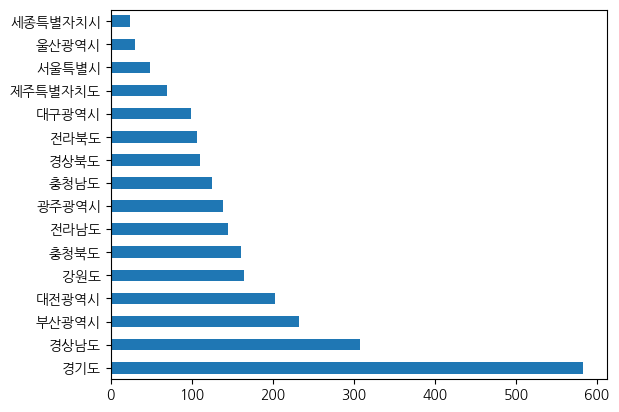

In [610]:
train['지역'].value_counts().plot.barh()

<Axes: >

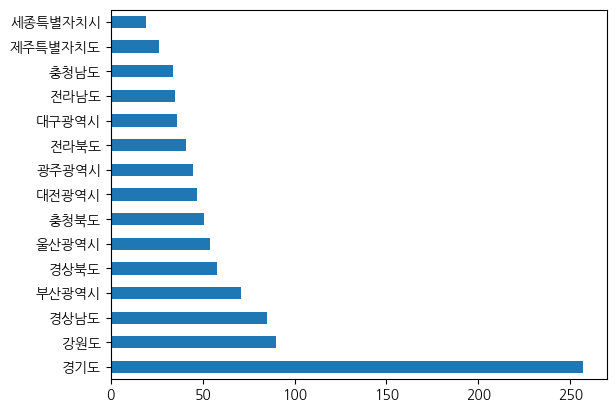

In [611]:
test['지역'].value_counts().plot.barh()

### 파생변수 생성 
- 세대별 평균 임대보증금
- 세대별 평균 임대료
- 주상복합유무 (인코딩 후 적용)
- 실거주율
- 전용면적별세대수 평균
- 지역 연령별 데이터 

In [612]:
# 나중에 Concat 해야됨
# 세대별 평균 임대보증금, 임대료
train_rent_avg = train.groupby('단지코드').agg({'임대보증금':'sum', '임대료': 'sum', '총합계':'unique'})
train_rent_avg['총합계'] = train_rent_avg['총합계'].astype(int)
train_rent_avg = train_rent_avg[['임대보증금', '임대료']].div(train_rent_avg['총합계'], axis=0) 
train_rent_avg = train_rent_avg.rename(columns={'임대보증금': '세대별 평균 임대보증금', '임대료': '세대별 평균 임대료'})
train_rent_avg

,세대별 평균 임대보증금,세대별 평균 임대료
단지코드,,
C1000,163295.05,1497.26
C1004,499990.65,3434.70
C1005,44862.76,582.29
C1013,95278.29,515.01
C1014,167929.72,1127.93
...,...,...
C2663,235170.98,2091.22
C2666,104559.96,736.96
C2670,126157.41,888.80


In [613]:
test_rent_avg = test.groupby('단지코드').agg({'임대보증금':'sum', '임대료': 'sum', '총합계':'unique'})
test_rent_avg['총합계'] = test_rent_avg['총합계'].astype(int)
test_rent_avg = test_rent_avg[['임대보증금', '임대료']].div(test_rent_avg['총합계'], axis=0) 
test_rent_avg = test_rent_avg.rename(columns={'임대보증금': '세대별 평균 임대보증금', '임대료': '세대별 평균 임대료'})
test_rent_avg

,세대별 평균 임대보증금,세대별 평균 임대료
단지코드,,
C1003,377500.00,1931.25
C1006,226692.74,1776.66
C1016,149466.56,1418.41
C1019,185140.19,1575.45
C1030,4406857.14,18361.43
...,...,...
C2653,106993.17,1106.05
C2675,540085.94,3647.64
C2676,257960.30,2208.58


In [614]:
# 나중에 Concat 해야됨
# 전용면적별세대수 평균
train_area_avg = train.groupby(['단지코드'])['전용면적별세대수'].mean() 
test_area_avg = test.groupby(['단지코드'])['전용면적별세대수'].mean()

In [615]:
# 실거주율
train['실거주율'] = (train['총합계'] - train['공가수']) / train['총합계']
test['실거주율'] = (test['총합계'] - test['공가수']) / test['총합계']

결론 : 지역별 연령 데이터 Drop
- 운전자 비율와 비운전자 비율을 변수화해서 머신러닝을 돌려봤을 때 효과가 없었다. 
- Why? : 연령보다 세대별 차량 수가 상관관계가 더 높다. 

In [616]:
# 희연님 
# minors = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)']
# middleage = ['40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)']


In [617]:
# 의균 
# drive_rate_men = df_age[['20대(남자)', '30대(남자)', '40대(남자)', '50대(남자)', '60대(남자)', '70대(남자)']].sum(axis=1) * 0.92
# drive_rate_women = df_age[['20대(여자)', '30대(여자)', '40대(여자)',  '50대(여자)','60대(여자)', '70대(여자)']].sum(axis=1) * 0.7052
# drive_rate = drive_rate_men + drive_rate_women

In [618]:
# regional_drive_rate = pd.concat([df_age['지역'],drive_rate], axis=1)
# regional_drive_rate = regional_drive_rate.set_index('지역')
# regional_drive_rate

In [619]:
# 민기님
# car_col = ['20대(여자)','20대(남자)','30대(여자)','30대(남자)','40대(여자)','40대(남자)',
#  '50대(여자)','50대(남자)','60대(여자)','60대(남자)','70대(여자)','70대(남자)']

# age_gender['차량보유인구(비율)'] = age_gender[car_col].sum(axis=1)

# train = train.merge(age_gender, left_on= ["지역"], right_on= ["지역"], how='left')
# test = test.merge(age_gender, left_on= ["지역"], right_on= ["지역"], how='left')

In [620]:
# 인혁님 
# python minors = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)','80대(여자)','80대(남자)','90대(여자)','90대(남자)','100대(여자)','100대(남자)']
# age_gender['운전 안하는 사람'] = age_gender[minors].sum(axis=1)


In [621]:
# 효정님
# x_driver = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', 
#             '80대(여자)','80대(남자)', '90대(여자)', '90대(남자)', 
#             '100대(여자)', '100대(남자)']
# age_gender['비운전자'] = age_gender[x_driver].sum(axis = 1)
# train_agg = train_agg.merge(age_gender, left_on = ['지역'], right_on = ['지역'], how = 'left') 


### 인코딩

- ['총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']는 하나의 단지코드의 하나의 값만 존재
- 나머지는 하나의 단지코드에 둘 이상의 값이 존재 -> 이 변수들은 따로따로 변수 만들어서 사용(인코딩)



In [622]:
train.groupby('단지코드').nunique().sum()

총합계                              411
임대건물구분                           444
지역                               411
공급유형                             475
전용면적                            1835
전용면적별세대수                        2155
공가수                              411
자격유형                             498
임대보증금                           1234
임대료                             1248
도보 10분거리 내 지하철역 수(환승노선 수 반영)     411
도보 10분거리 내 버스정류장 수               411
단지내주차면수                          411
등록차량수                            411
실거주율                             411
dtype: int64

### 고유값 1개 컬럼 train, test 데이터 만들기

In [623]:
unique_cols = ['총합계', '지역', '공가수', 
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
               '도보 10분거리 내 버스정류장 수',
               '단지내주차면수', '등록차량수', '실거주율']
train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()

# 아래의 리스트 컴프리헨션에서는 test에 없는 등록차량수를 제거한 리스트를 출력하게 해준다. 
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()


In [624]:
train_agg

,총합계,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,실거주율
단지코드,,,,,,,,
C2515,545,경상남도,17.00,0.00,3.00,624.00,205.00,0.97
C1407,914,대전광역시,13.00,1.00,1.00,1285.00,1064.00,0.99
C1945,635,경기도,6.00,1.00,3.00,734.00,730.00,0.99
C1470,696,전라북도,14.00,0.00,2.00,645.00,553.00,0.98
C1898,566,전라북도,9.00,0.00,6.00,517.00,415.00,0.98
...,...,...,...,...,...,...,...,...
C2586,90,제주특별자치도,7.00,0.00,3.00,66.00,57.00,0.92
C2035,492,강원도,24.00,0.00,1.00,521.00,246.00,0.95
C2020,40,부산광역시,7.00,1.00,2.00,25.00,19.00,0.82


In [625]:
test_agg

,총합계,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,실거주율
단지코드,,,,,,,
C1072,754,경기도,14.00,0.00,2.00,683.00,0.98
C1128,1354,경기도,9.00,0.00,3.00,1216.00,0.99
C1456,533,부산광역시,18.00,0.00,16.00,547.00,0.97
C1840,593,전라북도,7.00,0.00,3.00,543.00,0.99
C1332,1297,경기도,11.00,0.00,2.00,1112.00,0.99
...,...,...,...,...,...,...,...
C2456,346,제주특별자치도,17.00,0.00,4.00,270.00,0.95
C1266,591,충청북도,35.00,0.00,1.00,593.00,0.94
C2152,120,강원도,9.00,0.00,1.00,40.00,0.93


## 고유값 2개 이상 column

In [626]:
# 코드는 데이터프레임에서 특정 열(column)을 범주형(categorical) 변수로 취급하고, 
# 해당 변수의 값(value)을 이용하여 행렬 형태로 데이터를 재구성하는 함수입니다.
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+col for col in res.columns})
    return res

### 임대건물구분

- 목적: 오로지 상가인 건물은 없고 상가는 상가와 아파트가 합쳐진 주상복합(주거공간과 상업공간이 복합된 아파트)인 것으로 보임 만일 주상복합이라면 주차의 수요가 더 높을 것으로 보임

- VIF(다중공선성)에 의해 삭제

In [627]:
train_rent_type = reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter')
train_rent_type

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1000,0.00,1.00
C1004,1.00,1.00
C1005,0.00,1.00
C1013,0.00,1.00
C1014,0.00,1.00
...,...,...
C2663,0.00,1.00
C2666,0.00,1.00
C2670,0.00,1.00


In [628]:
train_rent_type['주상복합여부'] = (train_rent_type['임대건물구분_상가'] == 1) & (train_rent_type['임대건물구분_아파트'] == 1)
train_rent_type['주상복합여부'] = train_rent_type['주상복합여부'].astype(int)
train_rent_type

,임대건물구분_상가,임대건물구분_아파트,주상복합여부
단지코드,,,
C1000,0.00,1.00,0
C1004,1.00,1.00,1
C1005,0.00,1.00,0
C1013,0.00,1.00,0
C1014,0.00,1.00,0
...,...,...,...
C2663,0.00,1.00,0
C2666,0.00,1.00,0
C2670,0.00,1.00,0


### 공급유형

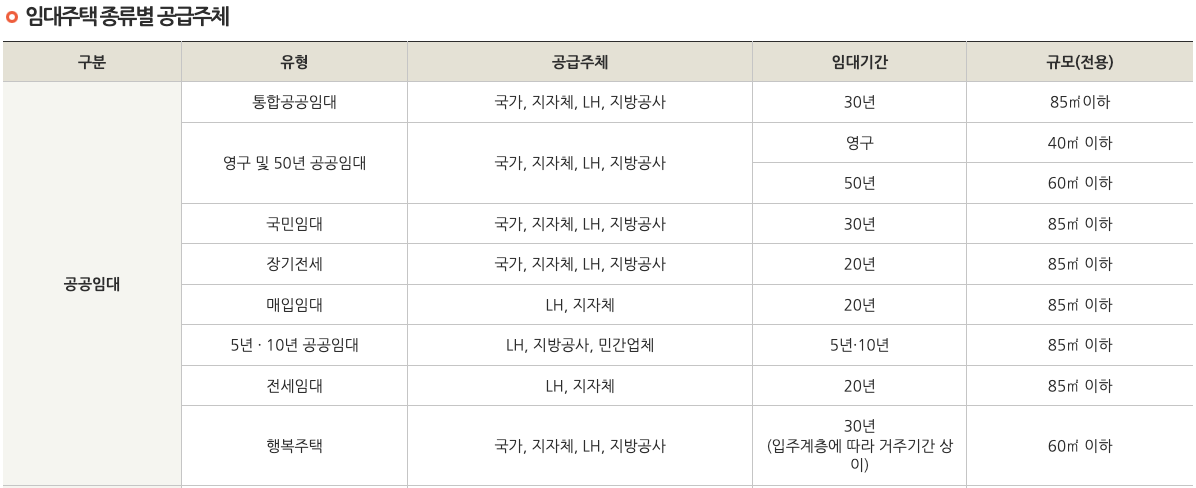

In [629]:
train['공급유형'].unique(), test['공급유형'].unique()

(array(['국민임대', '공공임대(50년)', '영구임대', '임대상가', '공공임대(10년)', '공공임대(분납)',
        '장기전세', '공공분양', '행복주택', '공공임대(5년)'], dtype=object),
 array(['국민임대', '영구임대', '임대상가', '공공임대(50년)', '공공임대(10년)', '공공임대(분납)',
        '행복주택'], dtype=object))

In [630]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

In [631]:
train['공급유형'].value_counts()

국민임대/장기전세             1702
임대상가                   285
행복주택                   192
공공임대(5년/10년/분납/분양)     190
영구임대                   149
공공임대(50년)               31
Name: 공급유형, dtype: int64

In [632]:
reshape_cat_features(data=train, cast_col='공급유형', value_col='counter').head(3)

,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택
단지코드,,,,,,
C1000,0.00,0.00,1.00,0.00,0.00,0.00
C1004,0.00,0.00,0.00,1.00,1.00,0.00
C1005,0.00,0.00,1.00,0.00,0.00,0.00


### 자격유형

- 공급유형과 자격유형의 crosstab을 보니 어떤 자격유형은 특정 공급유형에만 들어있는 것을 확인
- 15개로 세분화되어있는 자격유형을 공급유형과 연관지어 카테고리를 줄일 수 있을 것으로 보임

In [633]:
pd.crosstab(train['공급유형'], train['자격유형'], margins=True).style.background_gradient(cmap='coolwarm')

자격유형,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,All
공급유형,,,,,,,,,,,,,,,,
공공임대(50년),31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31
공공임대(5년/10년/분납/분양),183,0,0,7,0,0,0,0,0,0,0,0,0,0,0,190
국민임대/장기전세,1487,18,0,0,34,0,9,154,0,0,0,0,0,0,0,1702
영구임대,2,0,92,0,3,3,0,0,49,0,0,0,0,0,0,149
임대상가,0,0,0,285,0,0,0,0,0,0,0,0,0,0,0,285
행복주택,0,0,0,0,0,0,0,0,0,94,33,33,2,29,1,192
All,1703,18,92,292,37,3,9,154,49,94,33,33,2,29,1,2549


In [634]:
# Crosstab을 확인해 보면
# J, K, L, M, N, O 은 행복주택에만 해당됩니다. 
# C, F, I 는 영구임대에만 해당합니다. 
# H, G, E, B는 국민임대/장기전세 주택에만 해당합니다.(E의 경우 37중에 34가 해당합니다, 상대적으로 적음)
train.loc[train['자격유형'].isin(['J', 'K', 'L', 'M', 'N', 'O']), '자격유형'] = '공급대상_행복주택'
train.loc[train['자격유형'].isin(['C', 'F', 'I']), '자격유형'] = '공급대상_영구임대'
train.loc[train['자격유형'].isin(['H', 'G', 'E', 'B']), '자격유형'] = '공급대상_국민임대/장기전세'


In [635]:
test.loc[test['자격유형'].isin(['J', 'K', 'L', 'M', 'N', 'O']), '자격유형'] = '공급대상_행복주택'
test.loc[test['자격유형'].isin(['C', 'F', 'I']), '자격유형'] = '공급대상_영구임대'
test.loc[test['자격유형'].isin(['H', 'G', 'E', 'B']), '자격유형'] = '공급대상_국민임대/장기전세'


In [636]:
reshape_cat_features(train, cast_col='자격유형', value_col='counter')

,자격유형_A,자격유형_D,자격유형_공급대상_국민임대/장기전세,자격유형_공급대상_영구임대,자격유형_공급대상_행복주택
단지코드,,,,,
C1000,1.00,0.00,0.00,0.00,0.00
C1004,0.00,1.00,0.00,1.00,0.00
C1005,1.00,0.00,0.00,0.00,0.00
C1013,1.00,0.00,0.00,0.00,0.00
C1014,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
C2663,0.00,0.00,1.00,0.00,0.00
C2666,1.00,0.00,0.00,0.00,0.00
C2670,1.00,0.00,0.00,0.00,0.00


## 데이터 합치기

In [637]:
train_agg = pd.concat([train_agg,
                       train_rent_avg,
                       train_area_avg, 
                       reshape_cat_features(data=train, cast_col='공급유형', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')], axis=1) 

In [638]:
train_agg

,총합계,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,실거주율,세대별 평균 임대보증금,세대별 평균 임대료,...,공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_공급대상_국민임대/장기전세,자격유형_공급대상_영구임대,자격유형_공급대상_행복주택
단지코드,,,,,,,,,,,,,,,,,,,,,
C2515,545,경상남도,17.00,0.00,3.00,624.00,205.00,0.97,215614.68,1792.48,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
C1407,914,대전광역시,13.00,1.00,1.00,1285.00,1064.00,0.99,227434.35,1452.57,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
C1945,635,경기도,6.00,1.00,3.00,734.00,730.00,0.99,189453.54,1582.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
C1470,696,전라북도,14.00,0.00,2.00,645.00,553.00,0.98,101854.89,690.52,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
C1898,566,전라북도,9.00,0.00,6.00,517.00,415.00,0.98,184689.05,1263.06,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2586,90,제주특별자치도,7.00,0.00,3.00,66.00,57.00,0.92,1453333.33,6176.67,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
C2035,492,강원도,24.00,0.00,1.00,521.00,246.00,0.95,159857.72,1613.82,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
C2020,40,부산광역시,7.00,1.00,2.00,25.00,19.00,0.82,2110000.00,10198.25,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [639]:
test_agg = pd.concat([test_agg,
                      test_rent_avg,
                      test_area_avg,
                      reshape_cat_features(data=test, cast_col='공급유형', value_col='counter'),
                      reshape_cat_features(data=test, cast_col='자격유형', value_col='counter')], axis=1)
test_agg

,총합계,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,실거주율,세대별 평균 임대보증금,세대별 평균 임대료,전용면적별세대수,...,공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_공급대상_국민임대/장기전세,자격유형_공급대상_영구임대,자격유형_공급대상_행복주택
단지코드,,,,,,,,,,,,,,,,,,,,,
C1072,754,경기도,14.00,0.00,2.00,683.00,0.98,404458.89,2820.62,94.25,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
C1128,1354,경기도,9.00,0.00,3.00,1216.00,0.99,226827.92,1631.94,150.44,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
C1456,533,부산광역시,18.00,0.00,16.00,547.00,0.97,505889.31,3336.44,66.62,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
C1840,593,전라북도,7.00,0.00,3.00,543.00,0.99,127650.93,830.69,148.25,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
C1332,1297,경기도,11.00,0.00,2.00,1112.00,0.99,254954.51,1806.51,162.12,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2456,346,제주특별자치도,17.00,0.00,4.00,270.00,0.95,141372.83,1792.86,86.50,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
C1266,591,충청북도,35.00,0.00,1.00,593.00,0.94,121448.39,1691.02,118.20,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
C2152,120,강원도,9.00,0.00,1.00,40.00,0.93,150355.91,1528.44,60.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [640]:
train_agg = pd.get_dummies(train_agg)

In [641]:
test_agg = pd.get_dummies(test_agg)

In [642]:
train_agg

,총합계,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,실거주율,세대별 평균 임대보증금,세대별 평균 임대료,전용면적별세대수,...,지역_대전광역시,지역_부산광역시,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도
단지코드,,,,,,,,,,,,,,,,,,,,,
C2515,545,17.00,0.00,3.00,624.00,205.00,0.97,215614.68,1792.48,77.86,...,0,0,0,0,0,0,0,0,0,0
C1407,914,13.00,1.00,1.00,1285.00,1064.00,0.99,227434.35,1452.57,114.25,...,1,0,0,0,0,0,0,0,0,0
C1945,635,6.00,1.00,3.00,734.00,730.00,0.99,189453.54,1582.00,127.00,...,0,0,0,0,0,0,0,0,0,0
C1470,696,14.00,0.00,2.00,645.00,553.00,0.98,101854.89,690.52,174.00,...,0,0,0,0,0,0,1,0,0,0
C1898,566,9.00,0.00,6.00,517.00,415.00,0.98,184689.05,1263.06,94.33,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2586,90,7.00,0.00,3.00,66.00,57.00,0.92,1453333.33,6176.67,18.00,...,0,0,0,0,0,0,0,1,0,0
C2035,492,24.00,0.00,1.00,521.00,246.00,0.95,159857.72,1613.82,98.40,...,0,0,0,0,0,0,0,0,0,0
C2020,40,7.00,1.00,2.00,25.00,19.00,0.82,2110000.00,10198.25,13.33,...,0,1,0,0,0,0,0,0,0,0


In [643]:
test_agg

,총합계,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,실거주율,세대별 평균 임대보증금,세대별 평균 임대료,전용면적별세대수,공급유형_공공임대(50년),...,지역_대구광역시,지역_대전광역시,지역_부산광역시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도
단지코드,,,,,,,,,,,,,,,,,,,,,
C1072,754,14.00,0.00,2.00,683.00,0.98,404458.89,2820.62,94.25,0.00,...,0,0,0,0,0,0,0,0,0,0
C1128,1354,9.00,0.00,3.00,1216.00,0.99,226827.92,1631.94,150.44,0.00,...,0,0,0,0,0,0,0,0,0,0
C1456,533,18.00,0.00,16.00,547.00,0.97,505889.31,3336.44,66.62,0.00,...,0,0,1,0,0,0,0,0,0,0
C1840,593,7.00,0.00,3.00,543.00,0.99,127650.93,830.69,148.25,0.00,...,0,0,0,0,0,0,1,0,0,0
C1332,1297,11.00,0.00,2.00,1112.00,0.99,254954.51,1806.51,162.12,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2456,346,17.00,0.00,4.00,270.00,0.95,141372.83,1792.86,86.50,0.00,...,0,0,0,0,0,0,0,1,0,0
C1266,591,35.00,0.00,1.00,593.00,0.94,121448.39,1691.02,118.20,0.00,...,0,0,0,0,0,0,0,0,0,1
C2152,120,9.00,0.00,1.00,40.00,0.93,150355.91,1528.44,60.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [644]:
# test 데이터셋에 없는 서울특별시 값 채우기
test_agg['지역_서울특별시'] = 0

In [645]:
train_agg

,총합계,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,실거주율,세대별 평균 임대보증금,세대별 평균 임대료,전용면적별세대수,...,지역_대전광역시,지역_부산광역시,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도
단지코드,,,,,,,,,,,,,,,,,,,,,
C2515,545,17.00,0.00,3.00,624.00,205.00,0.97,215614.68,1792.48,77.86,...,0,0,0,0,0,0,0,0,0,0
C1407,914,13.00,1.00,1.00,1285.00,1064.00,0.99,227434.35,1452.57,114.25,...,1,0,0,0,0,0,0,0,0,0
C1945,635,6.00,1.00,3.00,734.00,730.00,0.99,189453.54,1582.00,127.00,...,0,0,0,0,0,0,0,0,0,0
C1470,696,14.00,0.00,2.00,645.00,553.00,0.98,101854.89,690.52,174.00,...,0,0,0,0,0,0,1,0,0,0
C1898,566,9.00,0.00,6.00,517.00,415.00,0.98,184689.05,1263.06,94.33,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2586,90,7.00,0.00,3.00,66.00,57.00,0.92,1453333.33,6176.67,18.00,...,0,0,0,0,0,0,0,1,0,0
C2035,492,24.00,0.00,1.00,521.00,246.00,0.95,159857.72,1613.82,98.40,...,0,0,0,0,0,0,0,0,0,0
C2020,40,7.00,1.00,2.00,25.00,19.00,0.82,2110000.00,10198.25,13.33,...,0,1,0,0,0,0,0,0,0,0


In [646]:
test_agg = test_agg[['총합계', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
       '단지내주차면수', '실거주율', '세대별 평균 임대보증금', '세대별 평균 임대료', '전용면적별세대수',
       '공급유형_공공임대(50년)', '공급유형_공공임대(5년/10년/분납/분양)', '공급유형_국민임대/장기전세',
       '공급유형_영구임대', '공급유형_임대상가', '공급유형_행복주택', '자격유형_A', '자격유형_D',
       '자격유형_공급대상_국민임대/장기전세', '자격유형_공급대상_영구임대', '자격유형_공급대상_행복주택', '지역_강원도',
       '지역_경기도', '지역_경상남도', '지역_경상북도', '지역_광주광역시', '지역_대구광역시', '지역_대전광역시',
       '지역_부산광역시', '지역_서울특별시', '지역_세종특별자치시', '지역_울산광역시', '지역_전라남도', '지역_전라북도',
       '지역_제주특별자치도', '지역_충청남도', '지역_충청북도']]

In [647]:
test_agg

,총합계,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,실거주율,세대별 평균 임대보증금,세대별 평균 임대료,전용면적별세대수,공급유형_공공임대(50년),...,지역_대전광역시,지역_부산광역시,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도
단지코드,,,,,,,,,,,,,,,,,,,,,
C1072,754,14.00,0.00,2.00,683.00,0.98,404458.89,2820.62,94.25,0.00,...,0,0,0,0,0,0,0,0,0,0
C1128,1354,9.00,0.00,3.00,1216.00,0.99,226827.92,1631.94,150.44,0.00,...,0,0,0,0,0,0,0,0,0,0
C1456,533,18.00,0.00,16.00,547.00,0.97,505889.31,3336.44,66.62,0.00,...,0,1,0,0,0,0,0,0,0,0
C1840,593,7.00,0.00,3.00,543.00,0.99,127650.93,830.69,148.25,0.00,...,0,0,0,0,0,0,1,0,0,0
C1332,1297,11.00,0.00,2.00,1112.00,0.99,254954.51,1806.51,162.12,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2456,346,17.00,0.00,4.00,270.00,0.95,141372.83,1792.86,86.50,0.00,...,0,0,0,0,0,0,0,1,0,0
C1266,591,35.00,0.00,1.00,593.00,0.94,121448.39,1691.02,118.20,0.00,...,0,0,0,0,0,0,0,0,0,1
C2152,120,9.00,0.00,1.00,40.00,0.93,150355.91,1528.44,60.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [648]:
train

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,실거주율
8,C2515,545,아파트,경상남도,국민임대/장기전세,33.48,276,17.00,A,9216000.00,82940.00,0.00,3.00,624.00,205.00,0.97
9,C2515,545,아파트,경상남도,국민임대/장기전세,39.60,60,17.00,A,12672000.00,107130.00,0.00,3.00,624.00,205.00,0.97
10,C2515,545,아파트,경상남도,국민임대/장기전세,39.60,20,17.00,A,12672000.00,107130.00,0.00,3.00,624.00,205.00,0.97
11,C2515,545,아파트,경상남도,국민임대/장기전세,46.90,38,17.00,A,18433000.00,149760.00,0.00,3.00,624.00,205.00,0.97
12,C2515,545,아파트,경상남도,국민임대/장기전세,46.90,19,17.00,A,18433000.00,149760.00,0.00,3.00,624.00,205.00,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대/장기전세,49.20,19,7.00,A,11346000.00,116090.00,0.00,1.00,166.00,146.00,0.97
2948,C2532,239,아파트,강원도,국민임대/장기전세,51.08,34,7.00,A,14005000.00,142310.00,0.00,1.00,166.00,146.00,0.97
2949,C2532,239,아파트,강원도,국민임대/장기전세,51.73,34,7.00,A,14005000.00,142310.00,0.00,1.00,166.00,146.00,0.97
2950,C2532,239,아파트,강원도,국민임대/장기전세,51.96,114,7.00,A,14005000.00,142310.00,0.00,1.00,166.00,146.00,0.97


### 다중공선성 확인

In [649]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수 분리
y = train['등록차량수']
X = train[['총합계', '전용면적', '전용면적별세대수', '공가수','단지내주차면수', '실거주율']]

# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

   VIF Factor  features
0        6.60       총합계
1        3.01      전용면적
2        1.84  전용면적별세대수
3        2.90       공가수
4        6.50   단지내주차면수
5        7.63      실거주율


### 상관계수 확인

<Axes: >

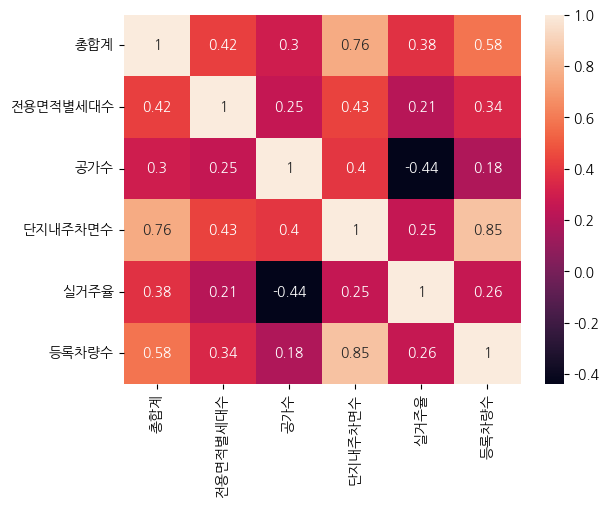

In [650]:
sns.heatmap(train_agg[['총합계', '전용면적별세대수', '공가수','단지내주차면수', '실거주율','등록차량수']].corr(), annot=True)

array([[<Axes: title={'center': '총합계'}>,
        <Axes: title={'center': '단지내주차면수'}>]], dtype=object)

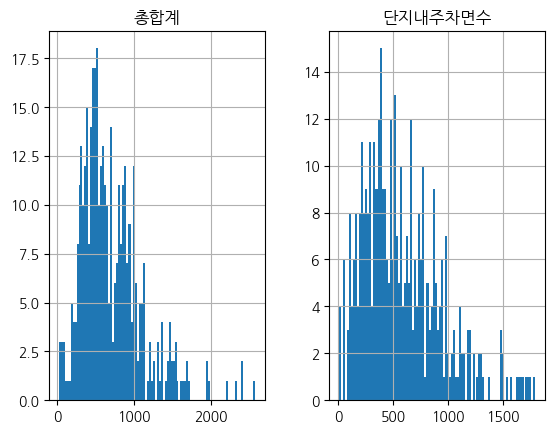

In [651]:
train_agg[['총합계', '단지내주차면수']].hist(bins=100)

In [652]:
train_agg_trial = train_agg.copy()
train_agg_trial['총합계'] = np.log(train_agg_trial['총합계'])
train_agg_trial['단지내주차면수'] = np.log(train_agg_trial['단지내주차면수'])

<Axes: >

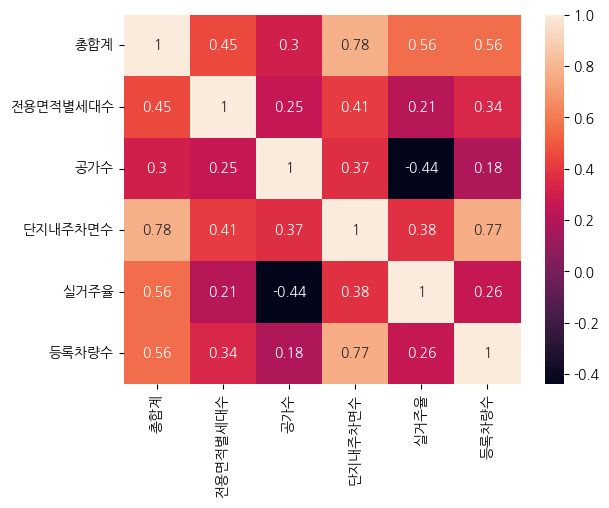

In [653]:
# 총합계와 단지내주차면수에 로그를 취한 상관계수 
sns.heatmap(train_agg_trial[['총합계', '전용면적별세대수', '공가수','단지내주차면수', '실거주율','등록차량수']].corr(), annot=True)

In [665]:
pd.DataFrame(train_agg.columns)

,0
0,총합계
1,공가수
2,도보 10분거리 내 지하철역 수(환승노선 수 반영)
3,도보 10분거리 내 버스정류장 수
4,단지내주차면수
5,등록차량수
6,실거주율
7,세대별 평균 임대보증금
8,세대별 평균 임대료
9,전용면적별세대수


In [664]:
pd.to_DataFrame(train_agg.columns)

AttributeError: module 'pandas' has no attribute 'to_DataFrame'

## 머신러닝

In [654]:
target_col = '등록차량수'

In [656]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# train 데이터와 test 데이터를 나누기 위한 패키지 import
from sklearn.model_selection import train_test_split

# 종속 변수와 독립 변수 분리
X_train = train_agg.drop('등록차량수', axis=1)  
y_train = train_agg['등록차량수']


# 모델 정의
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, criterion='absolute_error')

# 모델 학습
rf_regressor.fit(X_train, y_train)

# 예측
y_pred = rf_regressor.predict(test_agg)

In [659]:
sample_submission = pd.read_csv(submission)
sample_submission.head()

# test값이랑 동일하다
sample_submission['code'].value_counts().sum()

sample_submission['num'] = y_pred

sample_submission = sample_submission.set_index('code')
sample_submission

,num
code,
C1072,681.82
C1128,1161.96
C1456,504.25
C1840,598.23
C1332,1106.89
...,...
C2456,238.11
C1266,512.50
C2152,35.10


In [660]:
# 제출 
sample_submission.to_csv('submit_randomforest.csv')